In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def comp_class_accuracy(npy_path):
    # Read in the test result of model
    result = np.load(npy_path);
    pred_labels = result[0,:,:];
    real_labels = result[1,:,:];
    class_acc = np.zeros(10)
    for m_class in xrange(10):
        class_acc[m_class] = np.mean(np.equal(np.argmax(pred_labels[np.argmax(real_labels, axis=1)==m_class],axis=1),m_class)); 
    return class_acc

def plot_img(arr):
    plt.imshow(np.reshape(arr,newshape=(28,28)),cmap='gray');

def get_error_imgs(mnist, npy_path, predict_label, real_label):
    result = np.load(npy_path);
    pred_labels = result[0,:,:];
    real_labels = result[1,:,:];
    target = 6;
    error_matrix = np.zeros((10,10));
    i = predict_label
    j = real_label
    pred4i = pred_labels[np.argmax(real_labels, axis=1)==j];
    all_test_imgs = mnist.test.images;
    img4i = all_test_imgs[(np.argmax(real_labels, axis=1)==j)[0:len(all_test_imgs)]];
    err = np.equal(np.argmax(pred4i,axis=1),i);
    err_img = img4i[err[0:len(img4i)]];
    return err_img;

def comp_error_matrix(npy_path):
    """
    Calculate misclassified matrix
    """
    result = np.load(npy_path);
    pred_labels = result[0,:,:];
    real_labels = result[1,:,:];
    target = 6;
    error_matrix = np.zeros((10,10));
    for j in xrange(10):
        for i in xrange(10):
            if i == j:
                continue;
            err = np.equal(np.argmax(pred_labels[np.argmax(real_labels, axis=1)==j],axis=1),i);
            error_matrix[j,i] = np.sum(err);
    return error_matrix

def plot_class_accuracy(class_acc):
    plt.figure();
    plt.plot(class_acc);
    plt.title("Accuracy of different classes")
    plt.xlabel("Class");
    plt.ylabel("Accuracy");
    plt.show()    


In [7]:
noise_free_npy = "../result/blk5_fc512_b64/result.npy"
nf_acc = comp_class_accuracy(noise_free_npy);

In [8]:
n_std8_npy = "../result/blk5_fc512_b64/noisy_image/n_std_8/result.npy"
n_std32_npy = "../result/blk5_fc512_b64/noisy_image/n_std_32/result.npy"
n_std128_npy = "../result/blk5_fc512_b64/noisy_image/n_std_128/result.npy"
n_std8_acc= comp_class_accuracy(n_std8_npy);
n_std32_acc= comp_class_accuracy(n_std32_npy);
n_std128_acc= comp_class_accuracy(n_std128_npy);

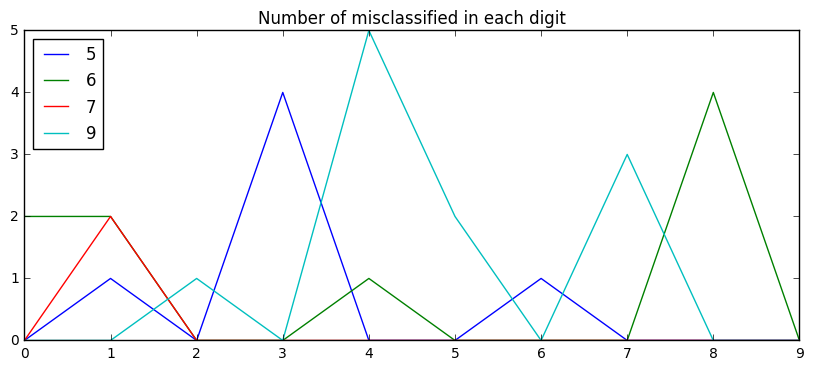

In [39]:
error_matrix = comp_error_matrix(noise_free_npy)
plt.figure(figsize=(10,4))
for i in [5,6,7,9]:
    plt.plot(xrange(10),error_matrix[i],label='%d' % i);
plt.title('Number of misclassified in each digit')
plt.legend(loc='upper left')
plt.show()

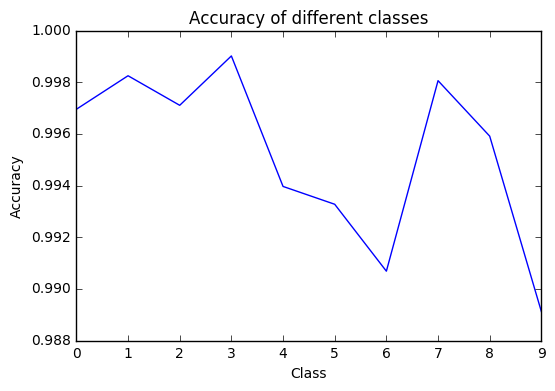

In [33]:
# Noise free class accuracy
plot_class_accuracy(nf_acc)

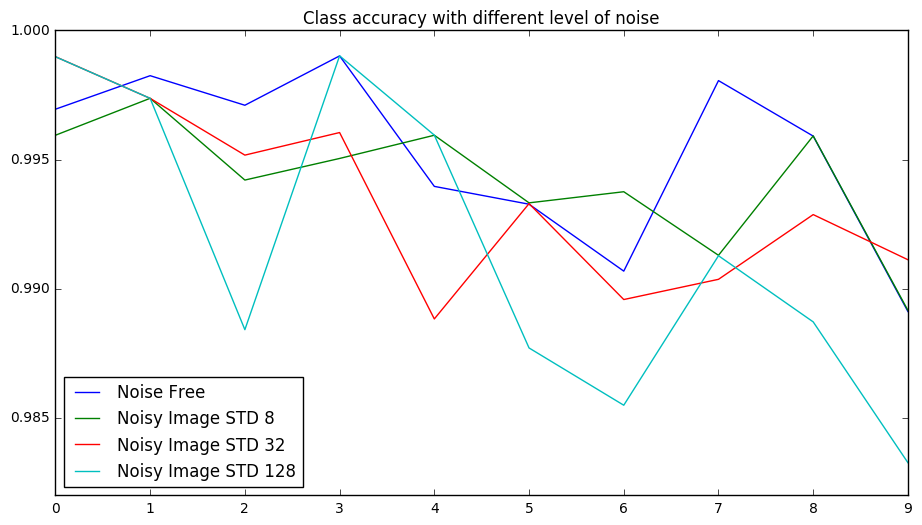

In [92]:
# Noisy Image
plt.figure(figsize=(11,6));
plt.plot([0,1,2,3,4,5,6,7,8,9], nf_acc,label='Noise Free');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_std8_acc,label='Noisy Image STD 8');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_std32_acc, label='Noisy Image STD 32')
plt.plot([0,1,2,3,4,5,6,7,8,9], n_std128_acc, label='Noisy Image STD 128')
plt.legend(loc='lower left')
plt.title("Class accuracy with different level of noise");
plt.show()

In [20]:
n_per5_npy = "../result/blk5_fc512_b64/noisy_label/n_percent_5/result.npy"
n_per15_npy = "../result/blk5_fc512_b64/noisy_label/n_percent_15/result.npy"
n_per50_npy = "../result/blk5_fc512_b64/noisy_label/n_percent_50/result.npy"
n_per5_acc= comp_class_accuracy(n_per5_npy);
n_per15_acc= comp_class_accuracy(n_per15_npy);
n_per50_acc= comp_class_accuracy(n_per50_npy);

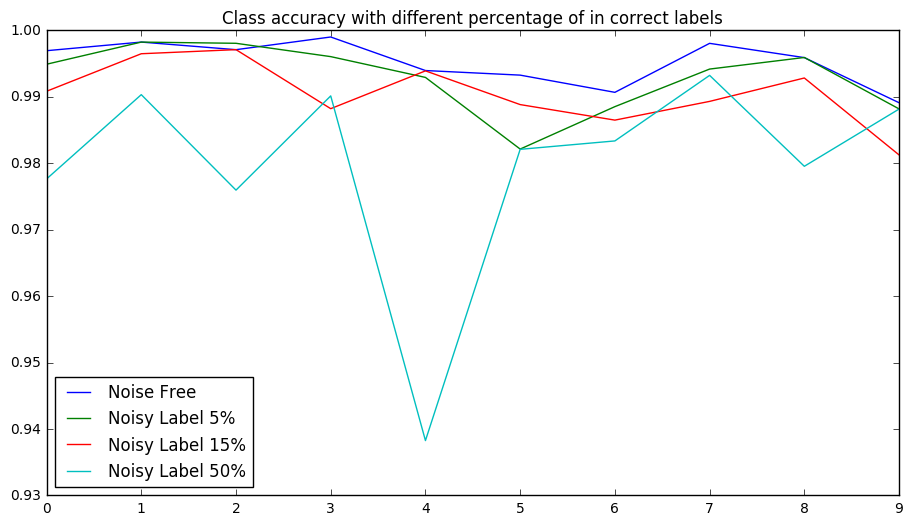

In [21]:
# Noisy Label
plt.figure(figsize=(11,6));
plt.plot([0,1,2,3,4,5,6,7,8,9], nf_acc,label='Noise Free');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_per5_acc,label='Noisy Label 5%');
plt.plot([0,1,2,3,4,5,6,7,8,9], n_per15_acc, label='Noisy Label 15%')
plt.plot([0,1,2,3,4,5,6,7,8,9], n_per50_acc, label='Noisy Label 50%')
plt.title("Class accuracy with different percentage of in correct labels");
plt.legend(loc='lower left')
plt.show()

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
train_dir = '../data/MNIST/';
mnist = input_data.read_data_sets(train_dir, one_hot=True);

Extracting ../data/MNIST/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/t10k-labels-idx1-ubyte.gz


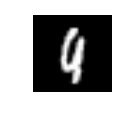

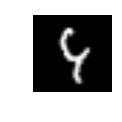

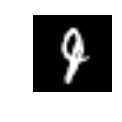

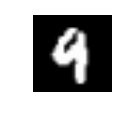

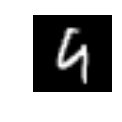

In [37]:
# Noise Free
for im in get_error_imgs(mnist, noise_free_npy,4,9):
    plt.figure(figsize=(1,1));
    plot_img(im)
    plt.axis('off')

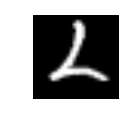

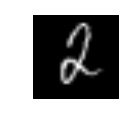

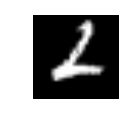

In [33]:
# Noise image
for i, im in enumerate(get_error_imgs(mnist, n_std128_npy,6,2)):
    plt.figure(figsize=(5,5));
    plt.subplot(1,4,i+1);
    plot_img(im)
    plt.axis('off')